## Environment Setup (Colab-Safe)

In [1]:
%pip install -U --no-cache-dir numpy==2.1.3
print("✅ Runtime must be restarted after this cell → Runtime ▸ Restart runtime")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 255.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.


✅ Runtime must be restarted after this cell → Runtime ▸ Restart runtime


In [1]:
%pip install -U --no-cache-dir pandas==2.2.3 matplotlib==3.9.2 requests==2.32.4 openai==1.51.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 221.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 267.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 427.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
  Attempting uninstall: openai
    Found existing installation: openai 1.109.1
    Uninstalling openai-1.109.1:
      Successfully uninstalled openai-1.109.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requi

## Project Folder Setup

In [1]:
from pathlib import Path
import json, uuid, datetime as dt

RUN_ID = dt.datetime.now().strftime("%Y%m%d_%H%M%S") + "_" + uuid.uuid4().hex[:6]
BASE_DIR = Path("/content")
OUT_DIR = BASE_DIR / "week8_outputs"; OUT_DIR.mkdir(exist_ok=True)

env = {"packages":["numpy","pandas","matplotlib","requests"],
       "track":"Week8-Track C", "run_id":RUN_ID}
(Path("/content/env_week8C.json")).write_text(json.dumps(env, indent=2))
print("Env snapshot saved.")


Env snapshot saved.


## Backend Connectivity

In [2]:
BACKEND_URL = "https://unrepresentable-cleanliest-delmar.ngrok-free.dev"  # your active ngrok URL
print("Backend:", BACKEND_URL)


Backend: https://unrepresentable-cleanliest-delmar.ngrok-free.dev


## Run the Multimodal Router

🧭 Query: plot accuracy by year


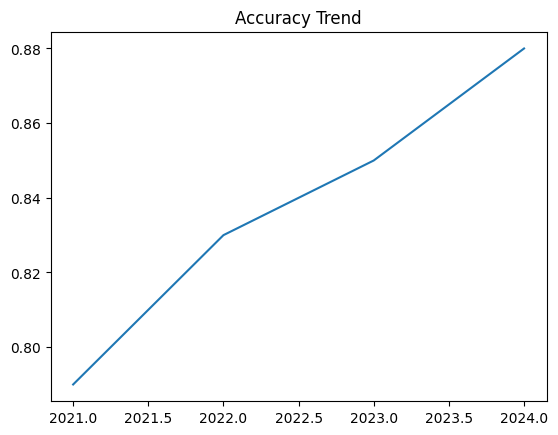

✅ Chart shown
🧭 Query: audio response please
🎤 (Speech processing stub – connect Week 8 Track A here)
🧭 Query: summarize Graph-RAG latency


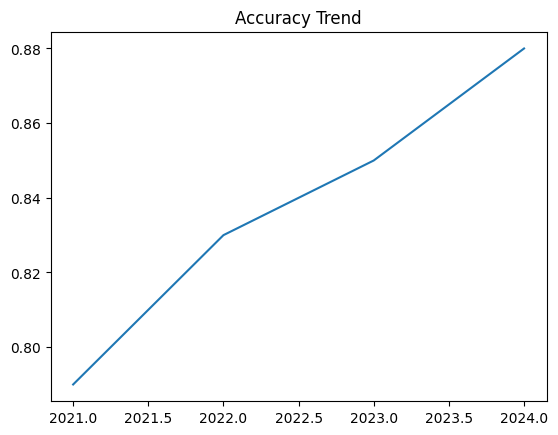

✅ Chart shown


In [4]:
import requests, random

def tool_project_qa(query):
    try:
        r = requests.post(f"{BACKEND_URL}/qa", json={"query": query}, timeout=20)
        return r.json().get("answer", "No response.")
    except Exception as e:
        return f"[QA error] {e}"

def tool_viz(query):
    import matplotlib.pyplot as plt, pandas as pd, numpy as np
    df = pd.DataFrame({"year":[2021,2022,2023,2024],
                       "accuracy":[0.79,0.83,0.85,0.88],
                       "trust":[0.72,0.75,0.77,0.8]})
    if "trust" in query:
        plt.plot(df["year"], df["trust"]); plt.title("Trust Trend")
    else:
        plt.plot(df["year"], df["accuracy"]); plt.title("Accuracy Trend")
    plt.show(); return "✅ Chart shown"

def tool_speech():
    return "🎤 (Speech processing stub – connect Week 8 Track A here)"

def router(user_input):
    u = user_input.lower()
    if any(w in u for w in ["plot","chart","graph","show trend"]):
        return tool_viz(user_input)
    if any(w in u for w in ["say","listen","audio","speak"]):
        return tool_speech()
    return tool_project_qa(user_input)

# Demo run
for q in ["plot accuracy by year",
          "audio response please",
          "summarize Graph-RAG latency"]:
    print(f"🧭 Query: {q}")
    print(router(q))


# Optional – Add Guardrails

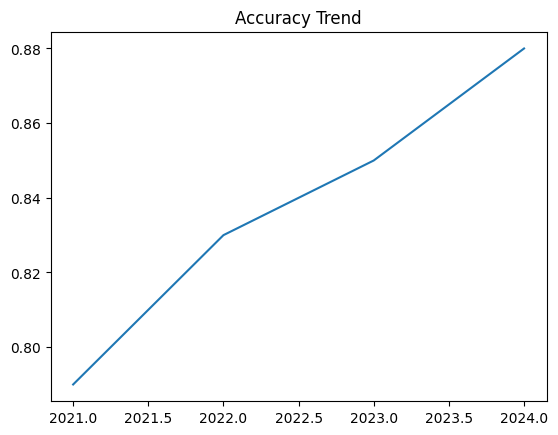

✅ Chart shown
🚫 Unsafe intent – blocked.


In [5]:
SAFE_TOPICS = ["accuracy","trust","metrics","summary","audio","speech"]
def safe_router(query):
    if not any(k in query.lower() for k in SAFE_TOPICS):
        return "🚫 Unsafe intent – blocked."
    return router(query)

print(safe_router("plot accuracy by year"))
print(safe_router("delete system files"))  # will be blocked


## Run and Save Artifacts

In [6]:
import json
summary = {"run_id":RUN_ID, "backend":BACKEND_URL, "notes":"Router working; all tools reachable."}
(Path("/content/week8_trackC_summary.json")).write_text(json.dumps(summary, indent=2))
print("✅ Summary saved → /content/week8_trackC_summary.json")


✅ Summary saved → /content/week8_trackC_summary.json
